# Regression #
### Disclaimer: ###
This notebook uses the code given in clinic 2 as reference to build and train the regression model.

In [42]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [6]:
# Open data frame
df = pd.read_csv('data_clean.csv')

for col in df.columns:
    print(col)

Unnamed: 0
title
company_name
location
via
description
job_highlights
detected_extensions
job_id
salary
salary_range
latitude
longitude
country
currency
euro_value
Apache_Spark
Apache_Flink
Apache_Beam
Artificial_intelligence
Big_data
Bokeh
Business_intelligence
C++
C#
Computer_science
Dash
Dask
Data_engineering
Data_management
Data_mining
Data_modeling
Data_visualization
Database
Deep_learning
Descriptive_statistics
Dimensionality_reduction
Django
Economics
ETL
Experimentation
Exploratory_data_analysis
FastAPI
Feature_engineering
Flask
Forecasting
Git
Hadoop
Hypothesis_testing
Information_retrieval
Java
JavaScript
Kafka
Keras
Leadership
Linear_algebra
Machine_learning
MapReduce
Mathematics
Matlab
Matplotlib
Metrics
Modeling
Natural_language_processing
Neural_networks
NoSQL
Numpy
Object-oriented_programming
Pandas
Pattern_recognition
Plotly
Performance_analysis
Problem-solving
Python
PyTorch
_R_
Recommender_systems
Regression_analysis
Risk_analysis
Root_cause_analysis
Sales_forecasting

In [38]:
def get_rmse(actual, predicted):
    error = np.sqrt(np.sum((actual - predicted)**2) / len(actual))
    return error

In [55]:
# Build regression model

starting_index = df.columns.get_loc('Apache_Spark')  # This is the first df column where the skills are starting

reg_columns = ['salary']
reg_columns += df.iloc[:, starting_index:].columns.tolist()

# Select relevant columns
reg_df = df.reindex(columns=reg_columns)

# Remove entries with no salary info
reg_df = reg_df[reg_df['salary'] != "Not available"]

# Split data into x and y for the regression model
X = reg_df.drop(['salary'], axis = 1)
y = reg_df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_test = y_test.astype(float)

In [56]:
alphas = np.arange(0.1, 200.1, .1)
model = lm.LassoCV(alphas=alphas, cv=5)
model.fit(X_train, y_train)

LassoCV(alphas=array([1.000e-01, 2.000e-01, 3.000e-01, ..., 1.998e+02, 1.999e+02,
       2.000e+02]),
        cv=5)

In [57]:
y_fitted = model.predict(X_train).astype(float)
y_predicted = model.predict(X_test).astype(float)

In [58]:
y_predicted

array([ -1974477.75052904,   -483935.59135508,   -176033.27057097,
        10395803.26802462,   1135918.75172251,   1720892.06035377,
         3349009.46932914,   1660793.03567385,   5564606.55799724,
         -932076.09342881,   -483935.59135508,  -2912782.91653691,
        -5448896.93378074,   1873298.24599583,   3038694.64737266,
         3385085.96447138,  12243896.20691242,   2086314.60402958,
         7452058.2351685 ,   6160162.16020873,   1822502.40782748,
         1469304.64683517,   1990639.93929513,  12135681.9579473 ,
          130498.91020598,  10395803.26802462,   4064608.40607   ,
        13211761.80664901,   9715318.00922385,     88476.64849666,
         3839356.88296628,   3349009.46932914,   3967145.47018483,
         1135918.75172251,   6786427.53945944,  -2805919.46106536,
          682248.97016814,   1899820.49270387,  17032892.86658814,
         1544616.78215256,    282428.86455661,  -1023508.77592277,
          282428.86455661,    932823.88308578,  -1161215.28371

Text(0.5, 1.0, 'Residuals of the Final Model')

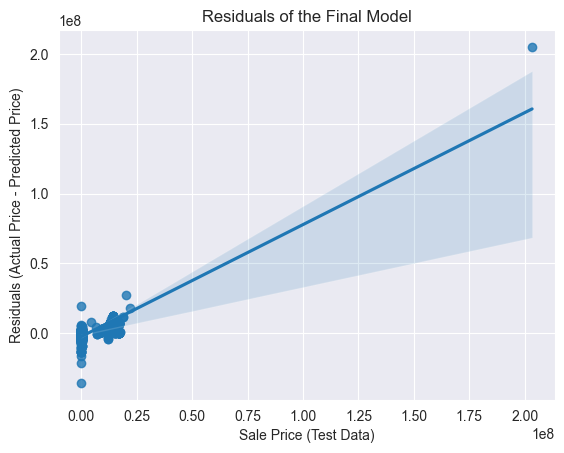

In [59]:
# Plot residuals
fm_residuals = y_test - y_predicted
sns.regplot(x=y_test, y=fm_residuals)
plt.xlabel('Sale Price (Test Data)')
plt.ylabel('Residuals (Actual Price - Predicted Price)')
plt.title('Residuals of the Final Model')

In [60]:
print(f'The validation RMSE for this model with '
      f'alpha={round(float(model.alpha_), 2)} is '
      f'{round(get_rmse(y_test, y_predicted), 2)}.')

The validation RMSE for this model with alpha=200.0 is 8763698.39.
